## TP3 Suite: Optimizing hyperparameters (Keras) - cifar-10 dataset 

In [1]:
import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import tensorflow as tf
from keras.utils import to_categorical, plot_model
import time
from keras.utils import to_categorical, plot_model

<h3> 1- Load and preprocess the Cifar-10 dataset by normalizing the data. </h3>

In [2]:
(x_train, y_train), (x_test, y_test) =  keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 245s 1us/step


In [3]:
x_train.shape

(50000, 32, 32, 3)

<h3> data normalization </h3>

In [4]:
x_train=x_train / 255.0
x_test=x_test / 255.0


In [5]:
x_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

<h3> visualize the data </h3>

['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']


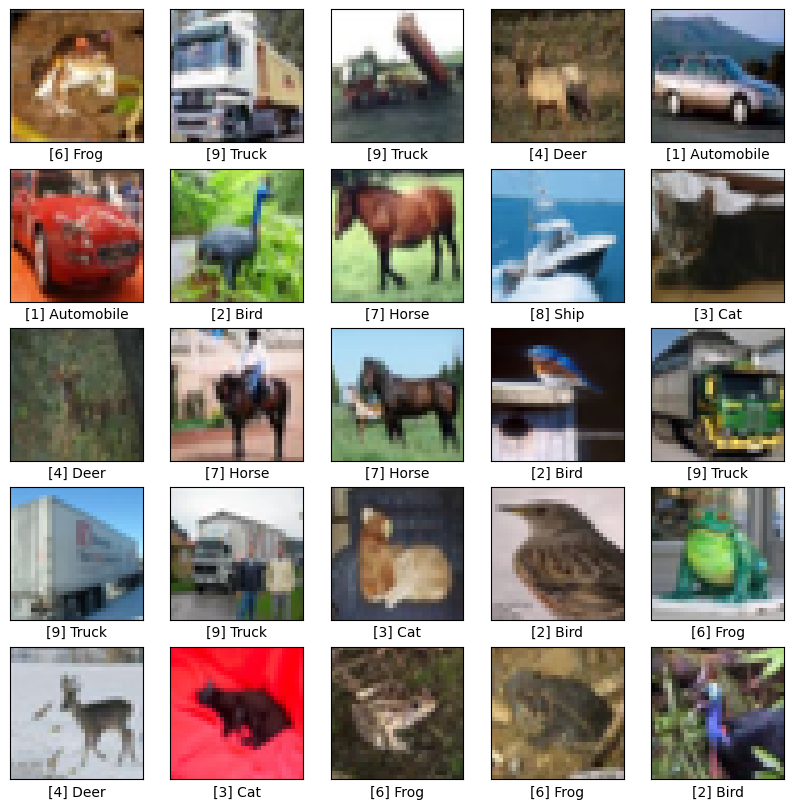

In [6]:
class_names =['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
print(class_names)

plt.figure(figsize=(10,10))
for i in range(25): 
  plt.subplot(5,5,i+1) 
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i], cmap=plt.cm.binary) 
    
  plt.xlabel("%s %s" % (y_train[i], class_names[y_train[i][0]])) 
plt.show()

<h3> 2- Use the same architecture as in the previous TP (TP2). </h3>

In [7]:
architecture = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(32,32,3)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(10,  activation='softmax')
])

In [8]:
architecture.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 128)               393344    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 402250 (1.53 MB)
Trainable params: 402250 (1.53 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


<h3> 3- Split the train set into training and validation sets, with a 20% validation set. </h3>

In [9]:
# Split the training set into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [10]:
x_train.shape

(40000, 32, 32, 3)

In [11]:
x_val.shape

(10000, 32, 32, 3)

In [12]:
x_test.shape

(10000, 32, 32, 3)

<h3> define a function for plotting the curves for each model </h3> 

In [13]:
def plot_learning_curves(history, title):
    plt.figure(figsize=(12, 4))
    
    
    plt.subplot(1, 2, 1)
    plt.plot( history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(title + ' - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot( history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(title + ' - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

<h3> 4- Train the designed architecture using Mini-batch Stochastic Gradient Descent (SGD) with a batch size of 128, a learning rate of 0.01, for 50 epochs. Plot the learning curves on the train and validation data. </h3>

In [14]:
mini_batch_sgd_model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(32,32,3)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(10,  activation='softmax')
])

In [15]:
mini_batch_sgd_model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [16]:
start_time = time.time()
history_sgd_mini_batch = mini_batch_sgd_model.fit(x_train, y_train, epochs=50, batch_size=128,  validation_data=(x_val,y_val), shuffle=True)
end_time = time.time()
mini_batch_sgd_model_training_time = end_time - start_time
print(f"Running time for mini batch sgd : {mini_batch_sgd_model_training_time} seconds")

Epoch 1/50


313/313 [==============================] - 23s 10ms/step - loss: 2.0537 - accuracy: 0.2676 - val_loss: 1.9386 - val_accuracy: 0.3128
Epoch 2/50
313/313 [==============================] - 2s 6ms/step - loss: 1.8748 - accuracy: 0.3401 - val_loss: 1.8772 - val_accuracy: 0.3332
Epoch 3/50
313/313 [==============================] - 3s 9ms/step - loss: 1.8060 - accuracy: 0.3672 - val_loss: 1.7794 - val_accuracy: 0.3733
Epoch 4/50
313/313 [==============================] - 3s 9ms/step - loss: 1.7625 - accuracy: 0.3825 - val_loss: 1.7777 - val_accuracy: 0.3718
Epoch 5/50
313/313 [==============================] - 3s 8ms/step - loss: 1.7249 - accuracy: 0.3933 - val_loss: 1.7264 - val_accuracy: 0.3826
Epoch 6/50
313/313 [==============================] - 3s 9ms/step - loss: 1.6951 - accuracy: 0.4061 - val_loss: 1.7079 - val_accuracy: 0.3877
Epoch 7/50
313/313 [==============================] - 3s 8ms/step - loss: 1.6685 - accuracy: 0.4145 - val_loss: 1.6642 - val_accuracy: 0.4092
Ep

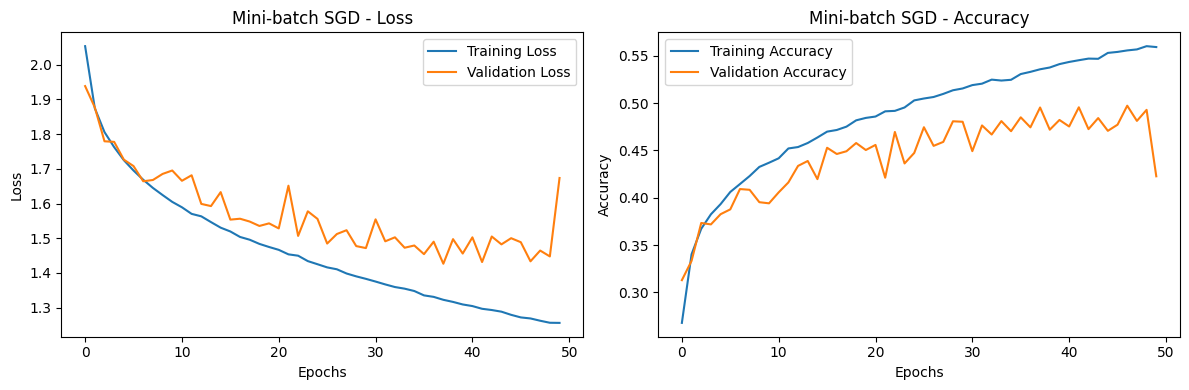

In [17]:
plot_learning_curves(history_sgd_mini_batch, 'Mini-batch SGD')

<h3> 5- Add L2 norm regularization to the second fully connected layer, and plot the learning curves on the train and validation data. Compare the results obtained between the architecture with and without L2 norm. </h3>

In [18]:
mini_batch_sgd_model_regularization = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(32,32,3)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu',  kernel_regularizer=tf.keras.regularizers.l2()),
  tf.keras.layers.Dense(10,  activation='softmax')
])

In [19]:
mini_batch_sgd_model_regularization.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [20]:
start_time = time.time()
history_sgd_mini_batch_regularization = mini_batch_sgd_model_regularization.fit(x_train, y_train, epochs=50, batch_size=128,  validation_data=(x_val,y_val), shuffle=True)
end_time = time.time()
mini_batch_regularization_sgd_model_training_time = end_time - start_time
print(f"Running time for mini batch sgd with regularization : {mini_batch_regularization_sgd_model_training_time} seconds")

Epoch 1/50
313/313 [==============================] - 5s 11ms/step - loss: 2.8671 - accuracy: 0.2598 - val_loss: 2.7036 - val_accuracy: 0.3126
Epoch 2/50
313/313 [==============================] - 3s 9ms/step - loss: 2.6010 - accuracy: 0.3398 - val_loss: 2.5261 - val_accuracy: 0.3516
Epoch 3/50
313/313 [==============================] - 3s 8ms/step - loss: 2.4574 - accuracy: 0.3634 - val_loss: 2.4611 - val_accuracy: 0.3336
Epoch 4/50
313/313 [==============================] - 3s 8ms/step - loss: 2.3419 - accuracy: 0.3794 - val_loss: 2.3377 - val_accuracy: 0.3589
Epoch 5/50
313/313 [==============================] - 3s 9ms/step - loss: 2.2526 - accuracy: 0.3876 - val_loss: 2.2161 - val_accuracy: 0.3881
Epoch 6/50
313/313 [==============================] - 3s 8ms/step - loss: 2.1690 - accuracy: 0.4013 - val_loss: 2.1468 - val_accuracy: 0.4007
Epoch 7/50
313/313 [==============================] - 3s 8ms/step - loss: 2.1007 - accuracy: 0.4069 - val_loss: 2.0678 - val_accuracy: 0.4064
Epoch

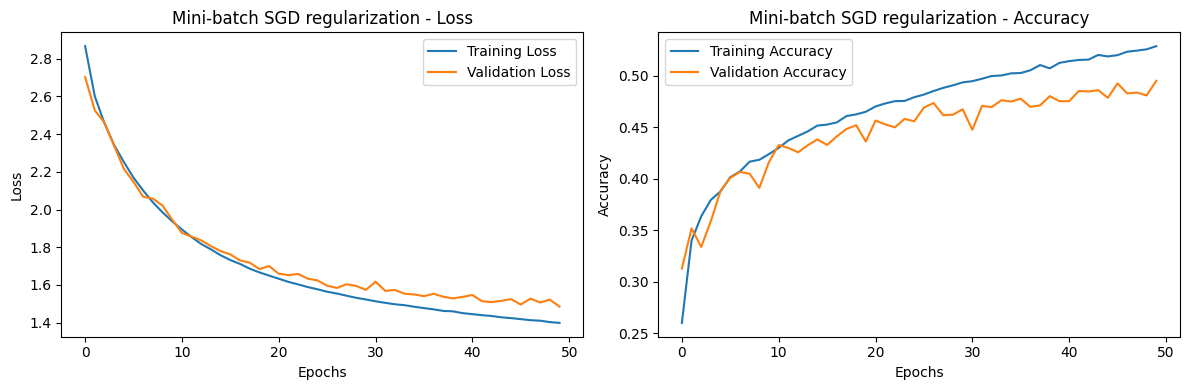

In [21]:
plot_learning_curves(history_sgd_mini_batch_regularization, 'Mini-batch SGD regularization')

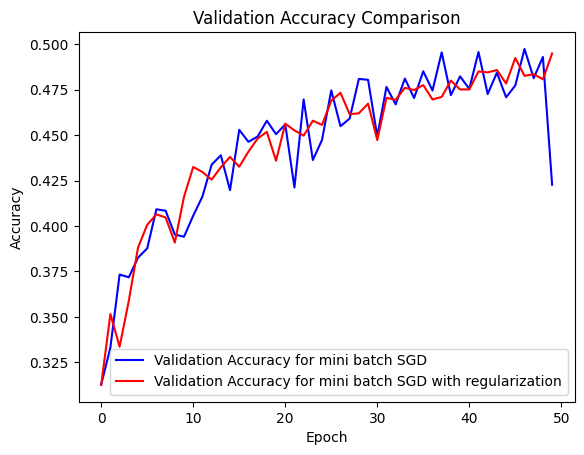

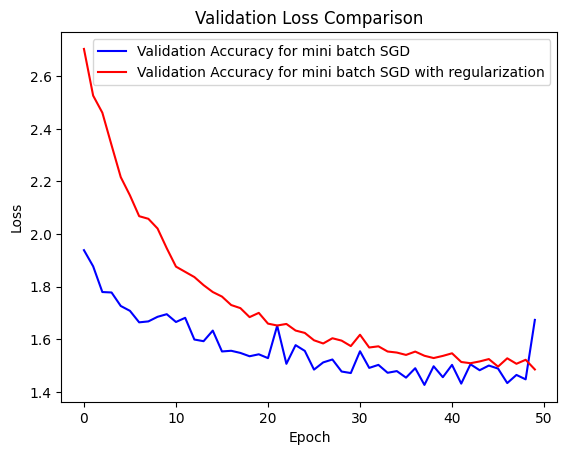

In [22]:
# Plot learning curves for accuracy
plt.plot(history_sgd_mini_batch.history['val_accuracy'], label='Validation Accuracy for mini batch SGD', color='blue')
plt.plot(history_sgd_mini_batch_regularization.history['val_accuracy'], label='Validation Accuracy for mini batch SGD with regularization', color='red')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy Comparison')
plt.legend()
plt.show()

# Plot learning curves for loss
plt.plot(history_sgd_mini_batch.history['val_loss'], label='Validation Accuracy for mini batch SGD', color='blue')
plt.plot(history_sgd_mini_batch_regularization.history['val_loss'], label='Validation Accuracy for mini batch SGD with regularization', color='red')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Validation Loss Comparison')
plt.legend()
plt.show()


<h3> 6- Add a dropout layer with rates of 0.2, 0.3, and 0.5 to the second fully connected layer, and compare the results obtained. </h3>

In [23]:
dropout_model_2 = tf.keras.models.Sequential([
     tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
     tf.keras.layers.Dense(128, activation='relu'),  
     tf.keras.layers.Dense(64, activation='relu'),
     tf.keras.layers.Dropout(0.2), 
     tf.keras.layers.Dense(10, activation='softmax')
])

In [24]:
dropout_model_2.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [25]:
start_time = time.time()
history_dropout_2 = dropout_model_2.fit(x_train, y_train, epochs=50, batch_size=128,  validation_data=(x_val,y_val), shuffle=True)
end_time = time.time()
dropout_model_2_training_time = end_time - start_time
print(f"Running time after adding dropout with rate 0.2 : {dropout_model_2_training_time} seconds")

Epoch 1/50
313/313 [==============================] - 10s 14ms/step - loss: 2.1015 - accuracy: 0.2308 - val_loss: 1.9498 - val_accuracy: 0.3049
Epoch 2/50
313/313 [==============================] - 3s 9ms/step - loss: 1.9333 - accuracy: 0.3026 - val_loss: 1.8922 - val_accuracy: 0.3240
Epoch 3/50
313/313 [==============================] - 3s 10ms/step - loss: 1.8696 - accuracy: 0.3320 - val_loss: 1.8103 - val_accuracy: 0.3582
Epoch 4/50
313/313 [==============================] - 3s 10ms/step - loss: 1.8283 - accuracy: 0.3490 - val_loss: 1.7708 - val_accuracy: 0.3741
Epoch 5/50
313/313 [==============================] - 3s 9ms/step - loss: 1.7961 - accuracy: 0.3600 - val_loss: 1.7786 - val_accuracy: 0.3701
Epoch 6/50
313/313 [==============================] - 3s 9ms/step - loss: 1.7737 - accuracy: 0.3717 - val_loss: 1.7366 - val_accuracy: 0.3868
Epoch 7/50
313/313 [==============================] - 3s 9ms/step - loss: 1.7486 - accuracy: 0.3814 - val_loss: 1.7200 - val_accuracy: 0.3840
Ep

<h3> dropout 0.3</h3>

In [26]:
dropout_model_3 = tf.keras.models.Sequential([
     tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
     tf.keras.layers.Dense(128, activation='relu'),  
     tf.keras.layers.Dense(64, activation='relu'),
     tf.keras.layers.Dropout(0.3), 
     tf.keras.layers.Dense(10, activation='softmax')
])

In [27]:
dropout_model_3.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [30]:
start_time = time.time()
history_dropout_3 = dropout_model_3.fit(x_train, y_train, epochs=50, batch_size=128,  validation_data=(x_val,y_val), shuffle=True)
end_time = time.time()
dropout_model_3_training_time = end_time - start_time
print(f"Running time after adding dropout with rate 0.3 : {dropout_model_3_training_time} seconds")

Epoch 1/50
313/313 [==============================] - 14s 45ms/step - loss: 1.2332 - accuracy: 0.5597 - val_loss: 1.3916 - val_accuracy: 0.5081
Epoch 2/50
313/313 [==============================] - 2s 7ms/step - loss: 1.2350 - accuracy: 0.5600 - val_loss: 1.4341 - val_accuracy: 0.5023
Epoch 3/50
313/313 [==============================] - 3s 9ms/step - loss: 1.2324 - accuracy: 0.5603 - val_loss: 1.3741 - val_accuracy: 0.5175
Epoch 4/50
313/313 [==============================] - 3s 10ms/step - loss: 1.2303 - accuracy: 0.5642 - val_loss: 1.4582 - val_accuracy: 0.4843
Epoch 5/50
313/313 [==============================] - 3s 11ms/step - loss: 1.2302 - accuracy: 0.5629 - val_loss: 1.4144 - val_accuracy: 0.5025
Epoch 6/50
313/313 [==============================] - 3s 10ms/step - loss: 1.2225 - accuracy: 0.5655 - val_loss: 1.4198 - val_accuracy: 0.5027
Epoch 7/50
313/313 [==============================] - 3s 10ms/step - loss: 1.2189 - accuracy: 0.5658 - val_loss: 1.4719 - val_accuracy: 0.4878


In [31]:
# # Plot learning curves for accuracy
# plt.plot(history_dropout_3.history['val_accuracy'], label='Validation Accuracy for mini batch SGD', color='blue')
# plt.plot(history_dropout_2.history['val_accuracy'], label='Validation Accuracy for mini batch SGD with regularization', color='red')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.title('Validation Accuracy Comparison')
# plt.legend()
# plt.show()

# # Plot learning curves for loss
# plt.plot(history_dropout_3.history['val_loss'], label='Validation Accuracy for mini batch SGD', color='blue')
# plt.plot(history_dropout_2.history['val_loss'], label='Validation Accuracy for mini batch SGD with regularization', color='red')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.title('Validation Loss Comparison')
# plt.legend()
# plt.show()


In [32]:
dropout_model_5 = tf.keras.models.Sequential([
     tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
     tf.keras.layers.Dense(128, activation='relu'),  
     tf.keras.layers.Dense(64, activation='relu'),
     tf.keras.layers.Dropout(0.5), 
     tf.keras.layers.Dense(10, activation='softmax')
])

In [33]:
dropout_model_5.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [34]:
start_time = time.time()
history_dropout_5 = dropout_model_3.fit(x_train, y_train, epochs=50, batch_size=128,  validation_data=(x_val,y_val), shuffle=True)
end_time = time.time()
dropout_model_5_training_time = end_time - start_time
print(f"Running time after adding dropout with rate 0.3 : {dropout_model_5_training_time} seconds")

Epoch 1/50
313/313 [==============================] - 6s 18ms/step - loss: 1.1117 - accuracy: 0.6016 - val_loss: 1.5226 - val_accuracy: 0.4760
Epoch 2/50
313/313 [==============================] - 3s 9ms/step - loss: 1.1049 - accuracy: 0.6038 - val_loss: 1.4305 - val_accuracy: 0.5010
Epoch 3/50
313/313 [==============================] - 3s 10ms/step - loss: 1.1036 - accuracy: 0.6054 - val_loss: 1.3847 - val_accuracy: 0.5182
Epoch 4/50
313/313 [==============================] - 3s 10ms/step - loss: 1.1075 - accuracy: 0.6045 - val_loss: 1.4204 - val_accuracy: 0.5096
Epoch 5/50
313/313 [==============================] - 3s 9ms/step - loss: 1.1009 - accuracy: 0.6088 - val_loss: 1.4301 - val_accuracy: 0.5060
Epoch 6/50
313/313 [==============================] - 3s 10ms/step - loss: 1.1031 - accuracy: 0.6061 - val_loss: 1.4262 - val_accuracy: 0.5070
Epoch 7/50
313/313 [==============================] - 3s 9ms/step - loss: 1.1008 - accuracy: 0.6084 - val_loss: 1.4043 - val_accuracy: 0.5151
Ep

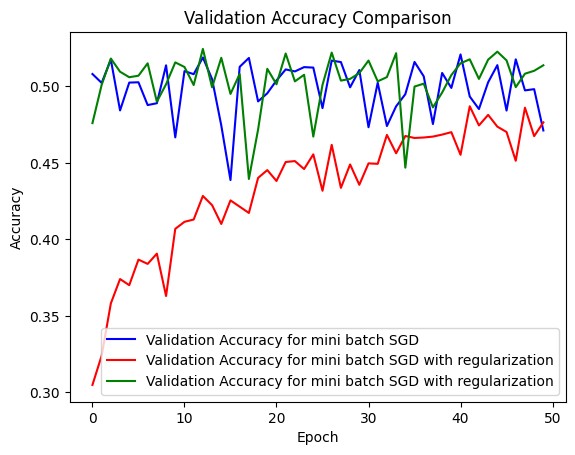

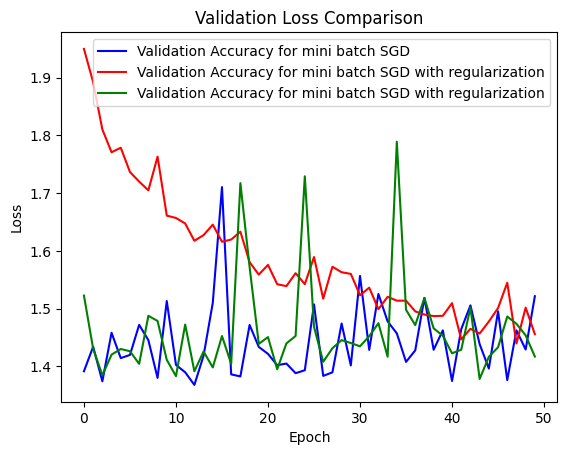

In [35]:
# Plot learning curves for accuracy
plt.plot(history_dropout_3.history['val_accuracy'], label='Validation Accuracy for mini batch SGD', color='blue')
plt.plot(history_dropout_2.history['val_accuracy'], label='Validation Accuracy for mini batch SGD with regularization', color='red')
plt.plot(history_dropout_5.history['val_accuracy'], label='Validation Accuracy for mini batch SGD with regularization', color='green')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy Comparison')
plt.legend()
plt.show()

# Plot learning curves for loss
plt.plot(history_dropout_3.history['val_loss'], label='Validation Accuracy for mini batch SGD', color='blue')
plt.plot(history_dropout_2.history['val_loss'], label='Validation Accuracy for mini batch SGD with regularization', color='red')
plt.plot(history_dropout_5.history['val_loss'], label='Validation Accuracy for mini batch SGD with regularization', color='green')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Validation Loss Comparison')
plt.legend()
plt.show()


### 7- early stopping

In [36]:
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

In [37]:
history = mini_batch_sgd_model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=50,
                    validation_data=(x_val, y_val),
                    callbacks=[early_stop])

Epoch 1/50
313/313 [==============================] - 3s 9ms/step - loss: 1.2439 - accuracy: 0.5630 - val_loss: 1.4679 - val_accuracy: 0.4808
Epoch 2/50
313/313 [==============================] - 2s 7ms/step - loss: 1.2376 - accuracy: 0.5644 - val_loss: 1.4473 - val_accuracy: 0.4923
Epoch 3/50
313/313 [==============================] - 2s 8ms/step - loss: 1.2347 - accuracy: 0.5654 - val_loss: 1.4529 - val_accuracy: 0.4915
Epoch 4/50
313/313 [==============================] - 3s 9ms/step - loss: 1.2306 - accuracy: 0.5681 - val_loss: 1.4530 - val_accuracy: 0.4837
Epoch 5/50
313/313 [==============================] - 3s 9ms/step - loss: 1.2232 - accuracy: 0.5697 - val_loss: 1.4421 - val_accuracy: 0.5036
Epoch 6/50
313/313 [==============================] - 3s 9ms/step - loss: 1.2221 - accuracy: 0.5705 - val_loss: 1.4112 - val_accuracy: 0.5015
Epoch 7/50
313/313 [==============================] - 3s 8ms/step - loss: 1.2143 - accuracy: 0.5741 - val_loss: 1.5025 - val_accuracy: 0.4809
Epoch 

In [38]:
# Get the epoch at which training stopped
epoch_stopped = len(history.history['loss'])
print(f"Training stopped at epoch: {epoch_stopped}")

Training stopped at epoch: 11


### 8- Add a batch normalization layer after the first hidden layer

In [46]:
from keras.layers import BatchNormalization


model_with_batch_normalization = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
    tf.keras.layers.Dense(128, activation='relu'),
    BatchNormalization(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

Epoch 1/50
313/313 [==============================] - 8s 16ms/step - loss: 1.0304 - accuracy: 0.6376 - val_loss: 1.8168 - val_accuracy: 0.4377
Epoch 2/50
313/313 [==============================] - 3s 9ms/step - loss: 1.0231 - accuracy: 0.6412 - val_loss: 1.7393 - val_accuracy: 0.4375
Epoch 3/50
313/313 [==============================] - 3s 9ms/step - loss: 1.0197 - accuracy: 0.6418 - val_loss: 1.6381 - val_accuracy: 0.4580
Epoch 4/50
313/313 [==============================] - 3s 9ms/step - loss: 1.0248 - accuracy: 0.6394 - val_loss: 1.8286 - val_accuracy: 0.4150
Epoch 5/50
313/313 [==============================] - 3s 9ms/step - loss: 1.0220 - accuracy: 0.6403 - val_loss: 1.8688 - val_accuracy: 0.4283
Epoch 6/50
313/313 [==============================] - 3s 9ms/step - loss: 1.0135 - accuracy: 0.6448 - val_loss: 1.7217 - val_accuracy: 0.4423
Epoch 7/50
313/313 [==============================] - 3s 11ms/step - loss: 1.0015 - accuracy: 0.6474 - val_loss: 1.8864 - val_accuracy: 0.4063
Epoc

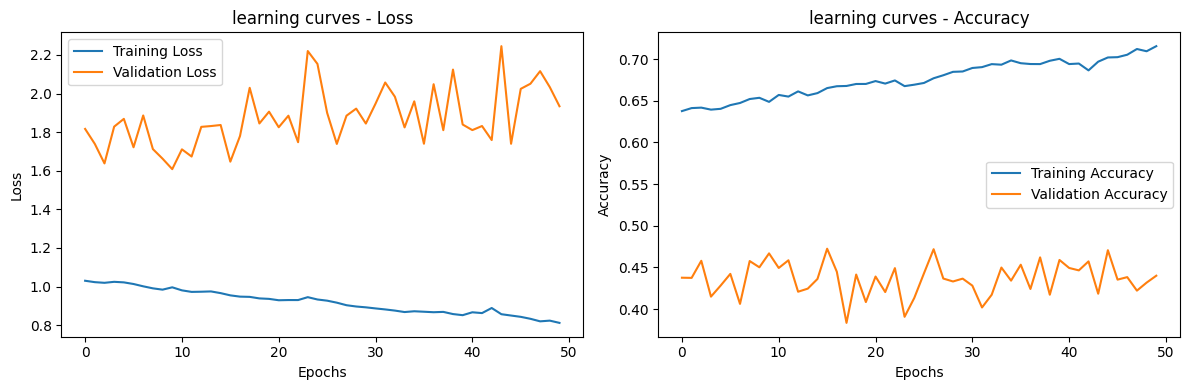

In [49]:
# Compile and train the model
model_with_batch_normalization.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
                                       loss='sparse_categorical_crossentropy',
                                       metrics=['accuracy'])
history = model_with_batch_normalization.fit(x_train, y_train,
                                             batch_size=128,
                                             epochs=50,
                                             validation_data=(x_val, y_val))

# Plot the learning curves
plot_learning_curves(history,title="learning curves")

## 9- Using Random search

- ### for the number of epochs , we took 11 because that we figured it out with the <b>" early stop"</b>, we don't need to use the random search for it

In [76]:
from sklearn.model_selection import RandomizedSearchCV
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.utils import to_categorical

# Function to create the model with hyperparameters as arguments
def create_tunable_model(learning_rate=0.01, dropout_rate=0.2):
    model = Sequential()
    model.add(Flatten(input_shape=(32, 32, 3)))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(10, activation='softmax')) 

    # Compile the model with SGD optimizer and specified learning rate
    optimizer = SGD(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    return model

# Define the hyperparameter space for the parameters we want to tune
param_dist = {
    'model__learning_rate': [0.01, 0.001, 0.0001],
    'model__dropout_rate': [0.2, 0.3, 0.5],
}


model = KerasClassifier(model=create_tunable_model, epochs=11, verbose=0)

# Perform random search
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, cv=3, n_iter=10)

# encoding y_train 
y_train_one_hot = to_categorical(y_train, num_classes=10)

#fit the model
random_search_result = random_search.fit(x_train, y_train_one_hot)


C:\Users\Amir\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Hyperparameters: {'model__learning_rate': 0.01, 'model__dropout_rate': 0.3}


In [77]:
print("Best Hyperparameters:", random_search_result.best_params_)

Best Hyperparameters: {'model__learning_rate': 0.01, 'model__dropout_rate': 0.3}
